In [131]:
import matplotlib.pyplot as plt
import time as t
import random
from prettytable import PrettyTable
import heapq as Heap

In [132]:
def dijkstra(graph, start):
    # Initialize distances and paths to all nodes as infinity and empty lists, respectively, except the starting node.
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    paths = {node: [] for node in graph}
    paths[start] = [start]

    # Initialize heap queue with the starting node.
    pq = [(0, start)]

    while pq:
        # Pop the node with the smallest distance from the heap queue.
        current_dist, current_node = Heap.heappop(pq)

        # Skip the node if we have already found a shorter path to it.
        if current_dist > distances[current_node]:
            continue

        # Update the distances and paths to all neighbors of the current node.
        for neighbor, weight in graph[current_node].items():
            distance = current_dist + weight

            # If we have found a shorter path to the neighbor, update its distance and path and add it to the heap queue.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                paths[neighbor] = paths[current_node] + [neighbor]
                Heap.heappush(pq, (distance, neighbor))

    return distances, paths

In [133]:
def floyd_warshall(graph):
    n = len(graph)
    D = [[float('inf')] * n for _ in range(n)]

    # Initialize D with the edge weights of the graph
    for i in range(n):
        D[i][i] = 0
        for j, w in graph[i+1].items():
            D[i][j - 1] = w

    # Calculate shortest paths between all pairs of vertices
    for k in range(n):
        for i in range(n):
            for j in range(n):
                D[i][j] = min(D[i][j], D[i][k] + D[k][j])

    return D

In [134]:
# Example graph
graph = {
    'A': {'B': 2, 'C': 2},
    'B': {'A': 2, 'C': 1},
    'C': {'A': 2, 'B': 1, 'D': 4},
    'D': {'C': 4}
}

# Find the shortest distance and path to all nodes from node 'A'
distances, paths = dijkstra(graph, 'A')
print(distances)
print(paths)


{'A': 0, 'B': 2, 'C': 2, 'D': 6}
{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'C', 'D']}


In [135]:
def get_graph_samples(nr_vertices, max_weight):
    edges_graph_dense = []
    edges_graph_sparse = []
    for i in range(1, nr_vertices):
        for j in range(i + 1, nr_vertices + 1):
            random_int = random.randrange(1, max_weight)
            edges_graph_dense.append([i, j, random_int])

    for edge in edges_graph_dense:
        if edge[0] == 1 or edge[1] - edge[0] == 1:
            edges_graph_sparse.append(edge)
    
    return edges_graph_dense, edges_graph_sparse

In [136]:
def get_graph_def(edges: list) -> dict:
    graph = {}
    for edge_def in edges:
        i, j, w = int(edge_def[0]), int(edge_def[1]), int(edge_def[2])
        if i not in graph:
            graph[i] = {j: w}
        else:
            graph[i][j] = w

        if j not in graph:
            graph[j] = {i: w}
        else:
            graph[j][i] = w
    return graph

In [137]:
edges_dense, edges_sparse = get_graph_samples(10, 100)

In [138]:
graph_dense = get_graph_def(edges_dense)
graph_dense

{1: {2: 58, 3: 64, 4: 80, 5: 86, 6: 80, 7: 57, 8: 50, 9: 4, 10: 29},
 2: {1: 58, 3: 94, 4: 20, 5: 73, 6: 68, 7: 20, 8: 59, 9: 92, 10: 31},
 3: {1: 64, 2: 94, 4: 2, 5: 53, 6: 40, 7: 77, 8: 57, 9: 27, 10: 80},
 4: {1: 80, 2: 20, 3: 2, 5: 16, 6: 20, 7: 87, 8: 2, 9: 20, 10: 19},
 5: {1: 86, 2: 73, 3: 53, 4: 16, 6: 79, 7: 83, 8: 3, 9: 42, 10: 37},
 6: {1: 80, 2: 68, 3: 40, 4: 20, 5: 79, 7: 94, 8: 60, 9: 6, 10: 49},
 7: {1: 57, 2: 20, 3: 77, 4: 87, 5: 83, 6: 94, 8: 93, 9: 43, 10: 69},
 8: {1: 50, 2: 59, 3: 57, 4: 2, 5: 3, 6: 60, 7: 93, 9: 86, 10: 67},
 9: {1: 4, 2: 92, 3: 27, 4: 20, 5: 42, 6: 6, 7: 43, 8: 86, 10: 59},
 10: {1: 29, 2: 31, 3: 80, 4: 19, 5: 37, 6: 49, 7: 69, 8: 67, 9: 59}}

In [139]:
graph_sparse = get_graph_def(edges_sparse)
graph_sparse

{1: {2: 58, 3: 64, 4: 80, 5: 86, 6: 80, 7: 57, 8: 50, 9: 4, 10: 29},
 2: {1: 58, 3: 94},
 3: {1: 64, 2: 94, 4: 2},
 4: {1: 80, 3: 2, 5: 16},
 5: {1: 86, 4: 16, 6: 79},
 6: {1: 80, 5: 79, 7: 94},
 7: {1: 57, 6: 94, 8: 93},
 8: {1: 50, 7: 93, 9: 86},
 9: {1: 4, 8: 86, 10: 59},
 10: {1: 29, 9: 59}}

In [140]:
distances, paths = dijkstra(graph_dense, 1)
print(distances)
print(paths)

{1: 0, 2: 44, 3: 26, 4: 24, 5: 29, 6: 10, 7: 47, 8: 26, 9: 4, 10: 29}
{1: [1], 2: [1, 9, 4, 2], 3: [1, 9, 4, 3], 4: [1, 9, 4], 5: [1, 9, 4, 8, 5], 6: [1, 9, 6], 7: [1, 9, 7], 8: [1, 9, 4, 8], 9: [1, 9], 10: [1, 10]}


In [141]:
distances, paths = dijkstra(graph_sparse, 1)
print(distances)
print(paths)

{1: 0, 2: 58, 3: 64, 4: 66, 5: 82, 6: 80, 7: 57, 8: 50, 9: 4, 10: 29}
{1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 3, 4], 5: [1, 3, 4, 5], 6: [1, 6], 7: [1, 7], 8: [1, 8], 9: [1, 9], 10: [1, 10]}


In [142]:
floyd_warshall(graph_dense)

[[0, 44, 26, 24, 29, 10, 47, 26, 4, 29],
 [44, 0, 22, 20, 25, 40, 20, 22, 40, 31],
 [26, 22, 0, 2, 7, 22, 42, 4, 22, 21],
 [24, 20, 2, 0, 5, 20, 40, 2, 20, 19],
 [29, 25, 7, 5, 0, 25, 45, 3, 25, 24],
 [10, 40, 22, 20, 25, 0, 49, 22, 6, 39],
 [47, 20, 42, 40, 45, 49, 0, 42, 43, 51],
 [26, 22, 4, 2, 3, 22, 42, 0, 22, 21],
 [4, 40, 22, 20, 25, 6, 43, 22, 0, 33],
 [29, 31, 21, 19, 24, 39, 51, 21, 33, 0]]

In [143]:
floyd_warshall(graph_sparse)

[[0, 58, 64, 66, 82, 80, 57, 50, 4, 29],
 [58, 0, 94, 96, 112, 138, 115, 108, 62, 87],
 [64, 94, 0, 2, 18, 97, 121, 114, 68, 93],
 [66, 96, 2, 0, 16, 95, 123, 116, 70, 95],
 [82, 112, 18, 16, 0, 79, 139, 132, 86, 111],
 [80, 138, 97, 95, 79, 0, 94, 130, 84, 109],
 [57, 115, 121, 123, 139, 94, 0, 93, 61, 86],
 [50, 108, 114, 116, 132, 130, 93, 0, 54, 79],
 [4, 62, 68, 70, 86, 84, 61, 54, 0, 33],
 [29, 87, 93, 95, 111, 109, 86, 79, 33, 0]]

In [144]:
def dijkstra_full(graph):
    for node in graph.keys():
        dijkstra(graph, node)

In [145]:
sample_size = [x for x in range(1, 101)]

In [146]:
ellapsed_time_dense_graph = []
ellapsed_time_sparse_graph = []
for n in sample_size:
  edges_dense, edges_sparse = get_graph_samples(n, 100)
  graph_dense = get_graph_def(edges_dense)
  graph_sparse = get_graph_def(edges_sparse)
  
  start = t.time()
  dijkstra_full(graph_dense)
  end = t.time()

  ellapsed_time_dense_graph.append(end-start)

  start = t.time()
  dijkstra_full(graph_sparse)
  end = t.time()

  ellapsed_time_sparse_graph.append(end-start)

In [147]:
ellapsed_time_dijkstra = [ellapsed_time_dense_graph, ellapsed_time_sparse_graph]

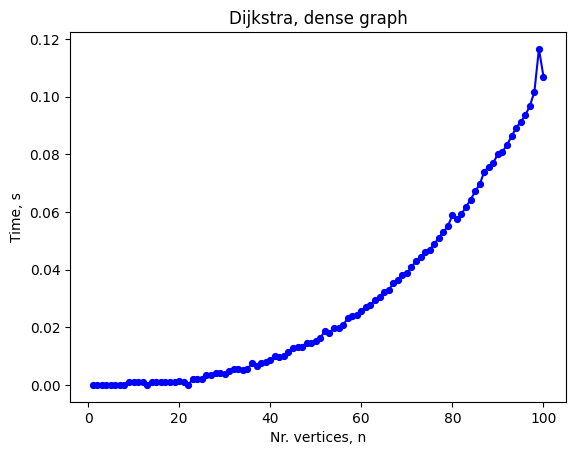

In [148]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_dense_graph, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("Nr. vertices, n")
ax.set_ylabel("Time, s")
ax.set_title("Dijkstra, dense graph")

plt.show()

In [149]:
table = PrettyTable()
table.field_names = ["Nr.vertices, n"] + sample_size[::9]
table.add_row(["Time, s"] + [round(x, 4) for x in ellapsed_time_dijkstra[0][::9]])
table

"Nr.vertices, n",1,10,19,28,37,46,55,64,73,82,91,100
"Time, s",0.0,0.001,0.001,0.004,0.0066,0.0132,0.0197,0.0303,0.0443,0.0593,0.0809,0.107


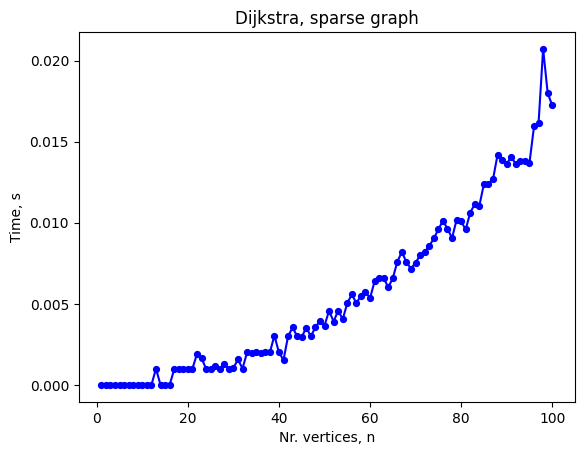

In [150]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_sparse_graph, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("Nr. vertices, n")
ax.set_ylabel("Time, s")
ax.set_title("Dijkstra, sparse graph")

plt.show()

In [151]:
table = PrettyTable()
table.field_names = ["Nr.vertices, n"] + sample_size[::9]
table.add_row(["Time, s"] + [round(x, 4) for x in ellapsed_time_dijkstra[1][::9]])
table

"Nr.vertices, n",1,10,19,28,37,46,55,64,73,82,91,100
"Time, s",0.0,0.0,0.001,0.0013,0.002,0.0035,0.005,0.006,0.0086,0.0106,0.0141,0.0172


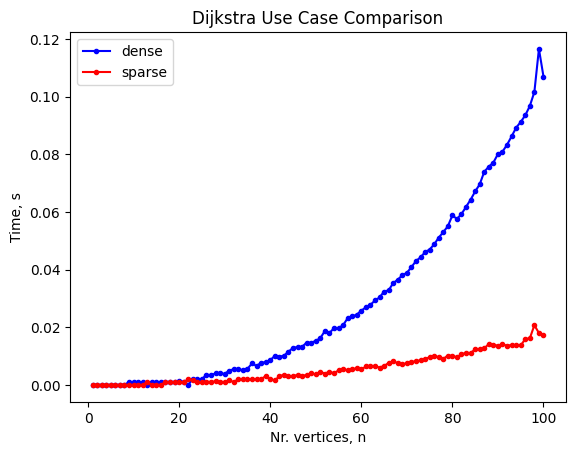

In [152]:
# plotting multiple curves simultaneously
plt.plot(sample_size, ellapsed_time_dense_graph, color='b', marker=".", label='dense')
plt.plot(sample_size, ellapsed_time_sparse_graph, color='r', marker=".", label='sparse')
  
plt.xlabel("Nr. vertices, n")
plt.ylabel("Time, s")
plt.title("Dijkstra Use Case Comparison")
  
plt.legend()  
plt.show()

In [153]:
ellapsed_time_dense_graph = []
ellapsed_time_sparse_graph = []
for n in sample_size:
  edges_dense, edges_sparse = get_graph_samples(n, 100)
  graph_dense = get_graph_def(edges_dense)
  graph_sparse = get_graph_def(edges_sparse)
  
  start = t.time()
  floyd_warshall(graph_dense)
  end = t.time()

  ellapsed_time_dense_graph.append(end-start)

  start = t.time()
  floyd_warshall(graph_sparse)
  end = t.time()

  ellapsed_time_sparse_graph.append(end-start)

In [154]:
ellapsed_time_floyd = [ellapsed_time_dense_graph, ellapsed_time_sparse_graph]

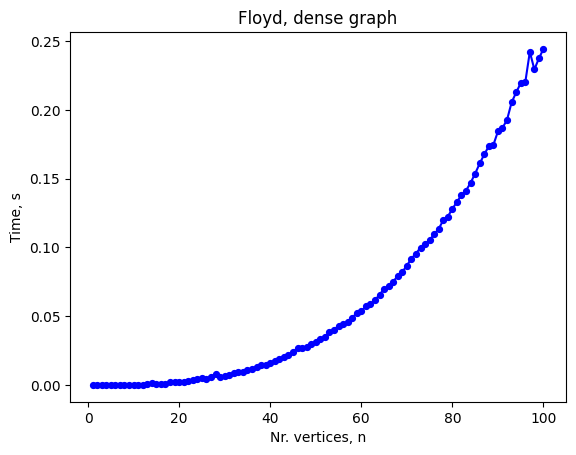

In [155]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_dense_graph, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("Nr. vertices, n")
ax.set_ylabel("Time, s")
ax.set_title("Floyd, dense graph")

plt.show()

In [156]:
table = PrettyTable()
table.field_names = ["Nr.vertices, n"] + sample_size[::9]
table.add_row(["Time, s"] + [round(x, 4) for x in ellapsed_time_floyd[0][::9]])
table

"Nr.vertices, n",1,10,19,28,37,46,55,64,73,82,91,100
"Time, s",0.0,0.0,0.002,0.0082,0.0132,0.027,0.0429,0.0656,0.1,0.1382,0.1869,0.2444


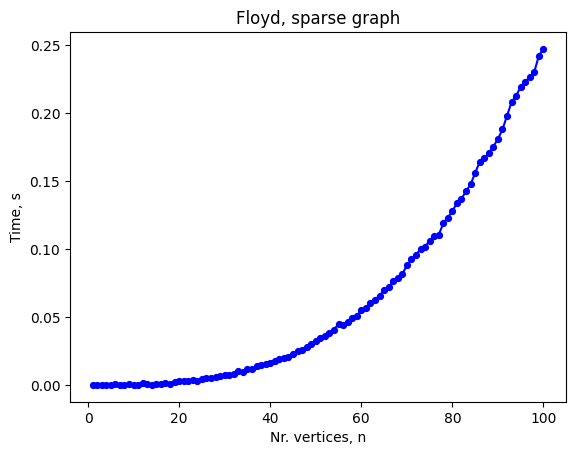

In [157]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_sparse_graph, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("Nr. vertices, n")
ax.set_ylabel("Time, s")
ax.set_title("Floyd, sparse graph")

plt.show()

In [158]:
table = PrettyTable()
table.field_names = ["Nr.vertices, n"] + sample_size[::9]
table.add_row(["Time, s"] + [round(x, 4) for x in ellapsed_time_floyd[1][::9]])
table

"Nr.vertices, n",1,10,19,28,37,46,55,64,73,82,91,100
"Time, s",0.0,0.0,0.002,0.0056,0.0138,0.025,0.0449,0.0657,0.0999,0.1369,0.1878,0.247


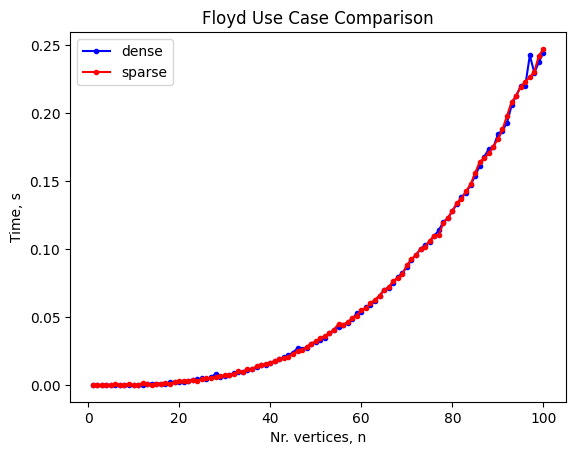

In [159]:
# plotting multiple curves simultaneously
plt.plot(sample_size, ellapsed_time_dense_graph, color='b', marker=".", label='dense')
plt.plot(sample_size, ellapsed_time_sparse_graph, color='r', marker=".", label='sparse')
  
plt.xlabel("Nr. vertices, n")
plt.ylabel("Time, s")
plt.title("Floyd Use Case Comparison")
  
plt.legend()  
plt.show()

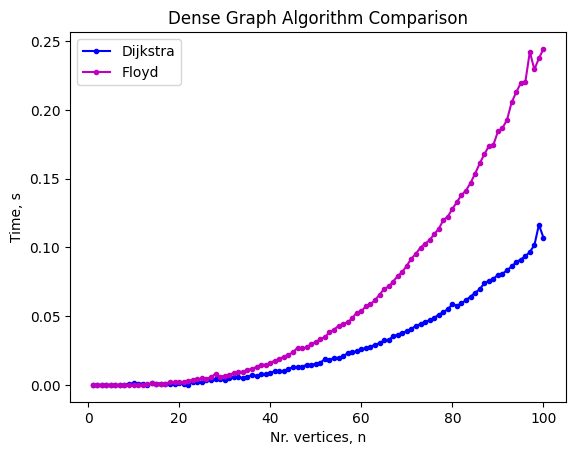

In [160]:
# plotting multiple curves simultaneously
plt.plot(sample_size, ellapsed_time_dijkstra[0], color='b', marker=".", label='Dijkstra')
plt.plot(sample_size, ellapsed_time_floyd[0], color='m', marker=".", label='Floyd')
  
plt.xlabel("Nr. vertices, n")
plt.ylabel("Time, s")
plt.title("Dense Graph Algorithm Comparison")
  
plt.legend()  
plt.show()

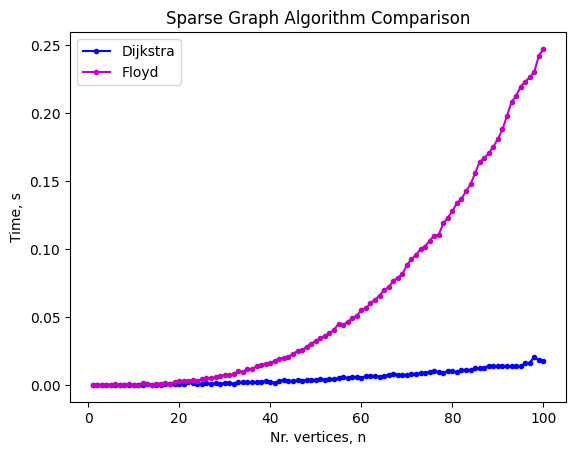

In [161]:
plt.plot(sample_size, ellapsed_time_dijkstra[1], color='b', marker=".", label='Dijkstra')
plt.plot(sample_size, ellapsed_time_floyd[1], color='m', marker=".", label='Floyd')
  
plt.xlabel("Nr. vertices, n")
plt.ylabel("Time, s")
plt.title("Sparse Graph Algorithm Comparison")
  
plt.legend()  
plt.show()